<a href="https://colab.research.google.com/github/andreac941/ComputerVision-Eq3/blob/main/0_ENTREGABLES/5.3_AlgorDominioFourier_Eq10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.3 Google Colab algoritmos de mejoramiento de imágenes en el dominio de Fourier
### Equipo 10:

##### Carlos Roberto Torres Ferguson - A01215432 
##### Andrea Carolina Treviño Garza - A01034993 
##### Julio Adrián Quintana Gracia - A01793661 
##### Pablo Alejandro Colunga Vázquez  - A01793671



## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

<b>Definicion de funciones<b>

In [ ]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

1) Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando <b>filtro pasabajas</b>. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,)

 <b> 1.1 Filtro basico Ideal LP </b>

(<matplotlib.axes._subplots.AxesSubplot at 0x7f76d7a4aa00>,
 Text(0.5, 1.0, 'Ideal Low Pass'))

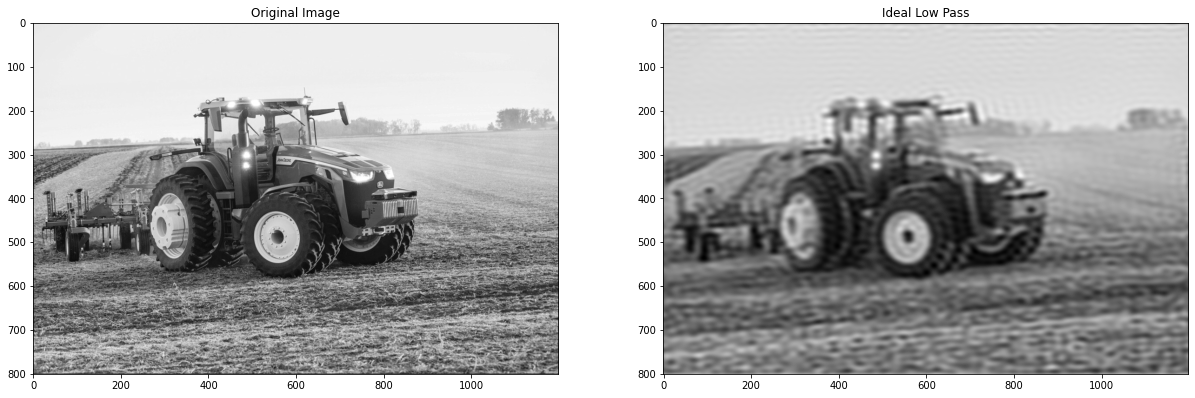

In [ ]:
img = cv2.imread("/content/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Ideal Low Pass")


<b> 1.2 Filtro basico butterworth LP </b>

(<matplotlib.axes._subplots.AxesSubplot at 0x7f76d79ce340>,
 Text(0.5, 1.0, 'Butterworth Low Pass'))

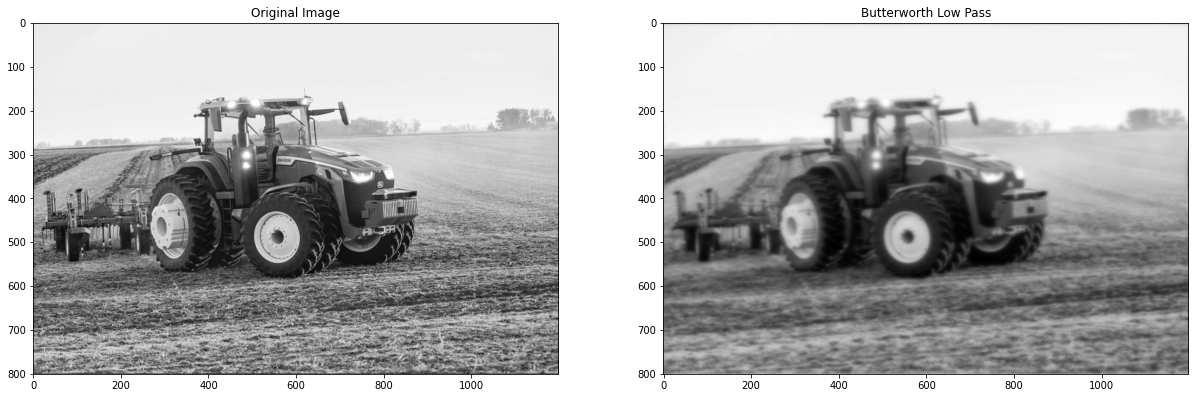

In [ ]:
img = cv2.imread("/content/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * butterworthLP(50,img.shape,1)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass")

<b> 1.3 Filtro basico Gaussian LP </b>

(<matplotlib.axes._subplots.AxesSubplot at 0x7f76d797a8b0>,
 Text(0.5, 1.0, 'Gaussian Low Pass'))

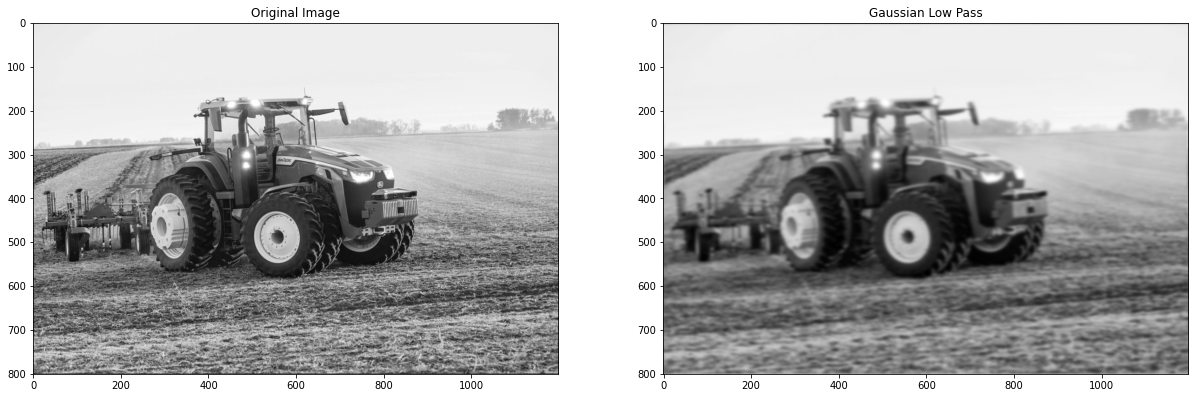

In [ ]:
img = cv2.imread("/content/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

#### Discución y comentarios finales
A traves de la transformada de fourier nos permite realizar analisis espectral de una imagen. Este tipo de procesamiento de imagenes nos lleva al espacio de frecuencias, para obtener informacion de los componentes predominante, por otra lado a traves de la aplicacion de varios tipos de filtros podemos aplicar el enfoque deseado para nuestro analisis, en el ejemplo anterior aplicamos 3 filtros basicos (ideal, Gaussian y Butterworth) para la imagen de un tractor en el campo, a traves de estos filtros en combinacion con el fitro pasabajas (remueve el ruido de alta frecuencia de una imagen y mantiene el de baja frecuencia)  establecemos enfoque en los puntos predominantes al centro, es decir la imagen procesada muestra los bordes difuminados

2) Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando <b>filtro pasa altas</b>. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos

 <b> 2.1 Filtro basico Ideal HP </b>

(<matplotlib.axes._subplots.AxesSubplot at 0x7f76d781c2e0>,
 Text(0.5, 1.0, 'Ideal High Pass'))

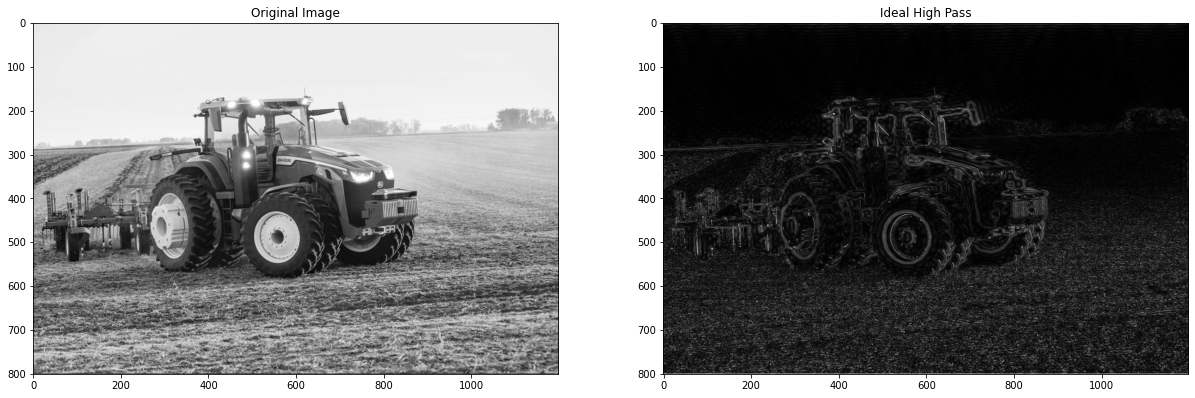

In [ ]:
img = cv2.imread("/content/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ideal High Pass")

<b> 2.2 Filtro basico butterworth HP </b>

(<matplotlib.axes._subplots.AxesSubplot at 0x7f76d7758700>,
 Text(0.5, 1.0, 'Butterworth High Pass'))

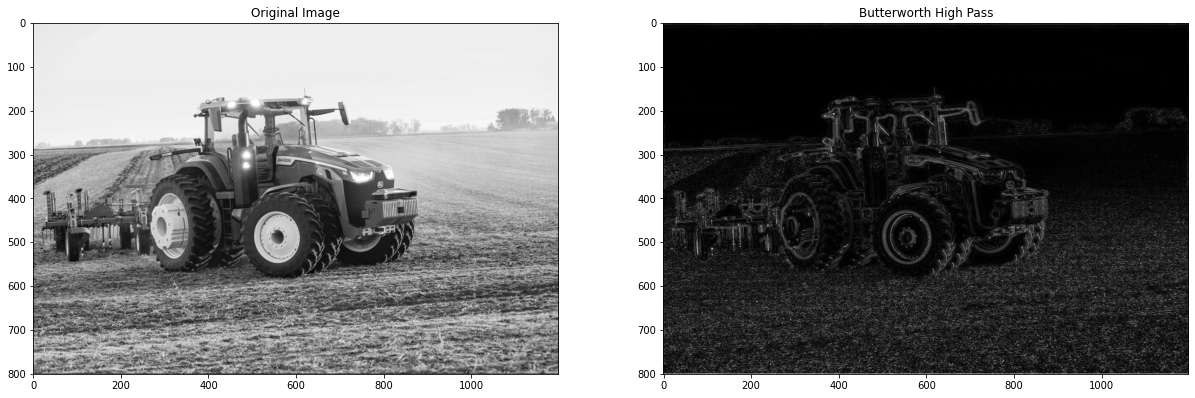

In [ ]:
img = cv2.imread("/content/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

HighPassCenter = center * butterworthHP(50,img.shape,3)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass")

<b> 2.3 Filtro basico Gaussian HP </b>

(<matplotlib.axes._subplots.AxesSubplot at 0x7f76d76f5bb0>,
 Text(0.5, 1.0, 'Gaussian High Pass'))

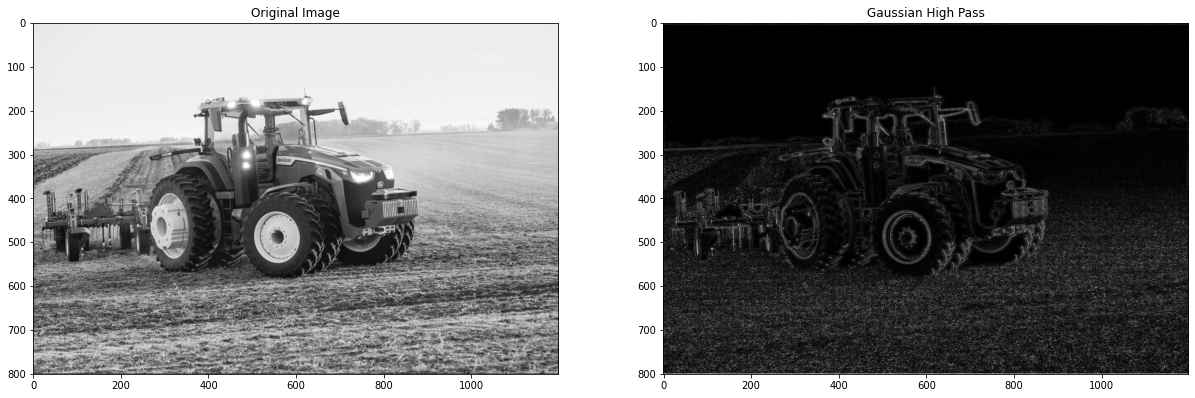

In [ ]:
img = cv2.imread("/content/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

#### Discución y comentarios finales
Continuando con el ejemplo anterior aplicamos igualmente 3 filtros basicos (ideal, Gaussian y Butterworth) para la imagen de un tractor, a traves de estos filtros en combinacion con el fitro pasa-altas (remueve el ruido de baja frecuencia de una imagen y mantiene el de alta frecuencia)  establecemos enfoque en los puntos predominantes en el contorno de la imagen,  es decir la imagen procesada muestra los bordes del objeto predominante para determinar sus frecuencias altas. 